In [30]:
!pip install -q pyomo
from pyomo.environ import *

In [31]:
import numpy as np
from numpy import linalg as LA

In [32]:
import pandas as pd
df = pd.read_csv('IE507_data.csv')

In [33]:
model2 = ConcreteModel()

In [34]:
model2.x = Var(range(3))
model2.q = Var(range(6))
model2.cost = Objective(expr=sum([model2.q[i] for i in range(6)]),sense=minimize)
model2.constraints = ConstraintList()

In [ ]:
for i in range(len(df['T'].values)):
  model2.constraints.add(expr=df['Reward'].values[i] - model2.x[0] - df['T'].values[i]*model2.x[1] - df['D'].values[i]*model2.x[2] + model2.q[i] >= 0)
  model2.constraints.add(expr=df['Reward'].values[i] - model2.x[0] - df['T'].values[i]*model2.x[1] - df['D'].values[i]*model2.x[2] - model2.q[i] <= 0)

  model2.constraints.add(expr=model2.x[0] >= 0)

In [35]:
model2.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   18 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
    q_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

2 Var Declarations
    q : Size=6, Index=q_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
          5 :  None :  None :  None : False :  T

In [36]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [37]:
opt_cbc = SolverFactory('cbc')

In [38]:
# getting results
results = opt_cbc.solve(model2)

# Printing results
print(results)


Problem: 
- Name: unknown
  Lower bound: 3986.158702
  Upper bound: 3986.158702
  Number of objectives: 1
  Number of constraints: 19
  Number of variables: 10
  Number of nonzeros: 6
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 12
  Error rc: 0
  Time: 0.05395102500915527
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  3986.158753

Optimal solution of :
x1 =  0.0
x2 =  4.0039722
x3 =  8969.6127


In [ ]:
# model cost
print('\nCost = ', model2.cost())

In [ ]:
# optimal solution of the cost
print('\nOptimal solution of :')
print('x1 = ', model2.x[0].value)
print('x2 = ', model2.x[1].value)
print('x3 = ', model2.x[2].value)

In [39]:
A = np.array([[1,1,1,1,1,1],df['T'].values,df['D'].values])

In [40]:
# create a model
model2 = ConcreteModel()

In [ ]:
# declare decision variables with initialization
model2.x = Var(range(3))

In [ ]:
# model objective
model2.cost = Objective(expr=sum([np.abs(df['Reward'].values[i] - model2.x[0] - df['T'].values[i]*model2.x[1] - df['D'].values[i]*model2.x[2])**(1.5) for i in range(6)]),sense=minimize)

In [ ]:
# model constraint
model2.constraints = ConstraintList()
model2.constraints.add(expr=model2.x[0] >= 0)

In [41]:
model2.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :    {1,}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

1 Var Declarations
    x : Size=3, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : abs(175 - x[0] - 2.962962963*x[1] - 0.024338624*x[2])**1.5 + abs(450 - x[0] - 4.6875*x[1] - 0.048076923*x[2])**1.5 + abs(1050 - x[0] - 12.40657698*x[1] - 0.038863976*x[2])**1.5 + abs(900 - x[0] - 45.5625*x[1] - 0.08*x[2])**1.5 + abs(

In [49]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [50]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [51]:
# getting results
results = solver.solve(model2)
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.026868581771850586
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  188066.92403421344

Optimal solution of :
x1 =  503.74058049659413
x2 =  2.7235987066661607
x3 =  4802.720279046181


In [ ]:
# printing the cost of the model
print('\nCost = ', model2.cost())

In [ ]:
# optimal solution
print('\nOptimal solution of :')
print('x1 = ', model2.x[0].value)
print('x2 = ', model2.x[1].value)
print('x3 = ', model2.x[2].value)

In [52]:
# create a model
model2 = ConcreteModel()

In [ ]:
# declare decision variables with initialization
model2.x = Var(range(3))

In [ ]:
# model objective
model2.cost = Objective(expr=sum([np.abs(df['Reward'].values[i] - model2.x[0] - df['T'].values[i]*model2.x[1] - df['D'].values[i]*model2.x[2])**2 for i in range(6)]),sense=minimize)

In [ ]:
# model constraints
model2.constraints = ConstraintList()
model2.constraints.add(expr=model2.x[0] >= 0)

In [53]:
model2.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :    {1,}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

1 Var Declarations
    x : Size=3, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : abs(175 - x[0] - 2.962962963*x[1] - 0.024338624*x[2])**2 + abs(450 - x[0] - 4.6875*x[1] - 0.048076923*x[2])**2 + abs(1050 - x[0] - 12.40657698*x[1] - 0.038863976*x[2])**2 + abs(900 - x[0] - 45.5625*x[1] - 0.08*x[2])**2 + abs(19 - x[0

In [54]:
# results
results = solver.solve(model2)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02692127227783203
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  8399946.9340104

Optimal solution of :
x1 =  884.3228326064175
x2 =  1.856236216858316
x3 =  3097.0705810748696


In [ ]:
#printing results
print(results)

In [ ]:
# model cost
print('\nCost = ', model2.cost())

In [ ]:
# optimal solution
print('\nOptimal solution of :')
print('x1 = ', model2.x[0].value)
print('x2 = ', model2.x[1].value)
print('x3 = ', model2.x[2].value)

In [55]:
arr = df.to_numpy()

In [65]:
op_1 = []
op_15 = []
op_2 = []
optimal = []

In [66]:
for i in range(arr.shape[0]):

  a = 0 + 4.003 * arr[i,5] + 8969.6127 * arr[i,6]
  b = 503.7405 + 2.7235 *arr[i,5] + 4802.72027 * arr [i,6]
  c = 884.3228 + 1.85623* arr[i,5] + 3097.07058 * arr[i,6]
  op_1.append(a)
  op_15.append(b)
  op_2.append(c)
  optimal.append(arr[i,2])

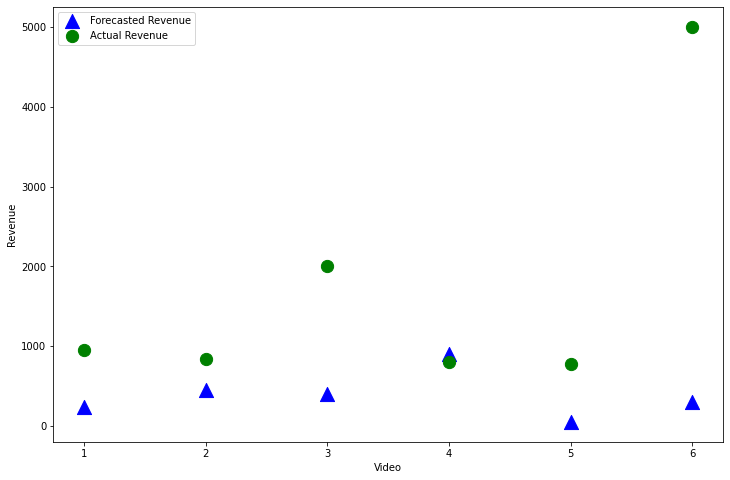

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(x=df.iloc[:,0], y=op_1, color='b', marker='^', s=200, label="Forecasted Revenue")
plt.scatter(x=df.iloc[:, 0], y=optimal, color='g', s=150, label="Actual Revenue")
plt.xlabel("Video")
plt.ylabel("Revenue")
plt.legend()
plt.show()

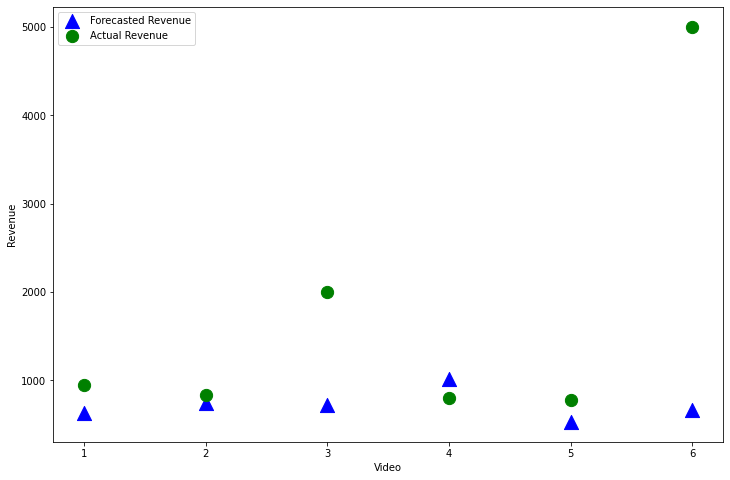

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(x=df.iloc[:,0], y=op_15, color='b', marker='^', s=200, label="Forecasted Revenue")
plt.scatter(x=df.iloc[:, 0], y=optimal, color='g', s=150, label="Actual Revenue")
plt.xlabel("Video")
plt.ylabel("Revenue")
plt.legend()
plt.show()

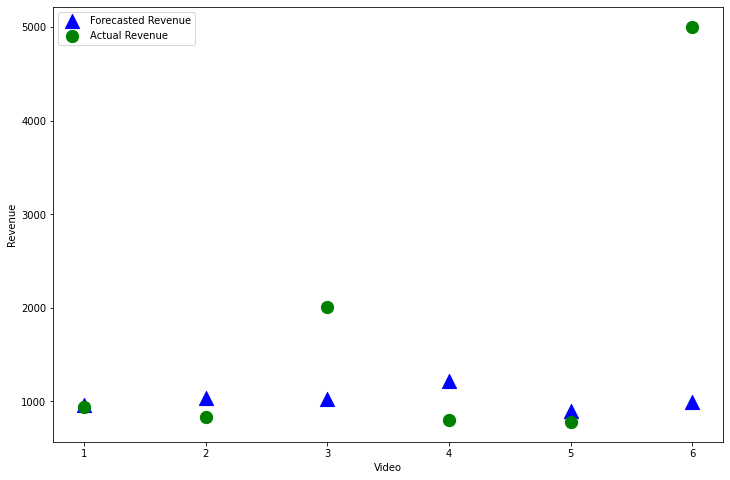

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(x=df.iloc[:,0], y=op_2, color='b', marker='^', s=200, label="Forecasted Revenue")
plt.scatter(x=df.iloc[:, 0], y=optimal, color='g', s=150, label="Actual Revenue")
plt.xlabel("Video")
plt.ylabel("Revenue")
plt.legend()
plt.show()

**Question 1**. We take the difference of R_tilda and R for each observation and take its absolute value. All the six expressions are then added together. This objective function has to be minimized.


minimize: 

abs(R_tilda - a_0{i=1} - a_1 * T_1{i=1} - a_2 * D_1 {i=1}) + 

abs(R_tilda - a_0{i=2} - a_1 * T_1{i=2} - a_2 * D_1 {i=2}) +

abs(R_tilda - a_0{i=3} - a_1 * T_1{i=3} - a_2 * D_1 {i=3}) +

abs(R_tilda - a_0{i=4} - a_1 * T_1{i=4} - a_2 * D_1 {i=4}) +

abs(R_tilda - a_0{i=5} - a_1 * T_1{i=5} - a_2 * D_1 {i=5}) +

abs(R_tilda - a_0{i=6} - a_1 * T_1{i=6} - a_2 * D_1 {i=6}) +


Constraints such that:

$\sum_{l=1}^{6} a_{0i} + a_{1i} * T_{i} + a_{2i} * D_{i} $ $= R_{i}$

R_tilda >= 0

a_0 >= 0

a_1 and a_2 are unrestriced

Further to address the absolute operator each of the above terms :

abs(R_tilda - a_0{i=1} - a_1 * T_1{i=1} - a_2 * D_1 {i=1}) 

for i = 1 to 6 

will be 

abs(R_tilda - a_0{i=1} - a_1 * T_1{i=1} - a_2 * D_1 {i=1}) >= 0

abs(R_tilda - a_0{i=1} - a_1 * T_1{i=1} - a_2 * D_1 {i=1}) <= 0



**Question 4.** The cbc solver message is given below.

Our observation is that, a_0 is zero, which implies that there is no reward for zero views on a video. 

Further, the variable a_2 has a higher coefficient. Accordingly, the reward (money given to video uploader) is very sensitive and positively related to number of ads viewed without being skipped. 

Solver: 

Solver: 
- Status: ok
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
    
Cost =  3986.158753

Optimal solution of :
x1 =  0.0
x2 =  4.0039722
x3 =  8969.6127

**Question 5.**

We take the square of difference of R_tilda and R for each observation and sum them to obtain the objective function.This objective function has to be minimized.


minimize

(R_tilda - a_0{i=1} - a_1 * T_1{i=1} - a_2 * D_1 {i=1})^2 + 

(R_tilda - a_0{i=2} - a_1 * T_1{i=2} - a_2 * D_1 {i=2})^2 +

(R_tilda - a_0{i=3} - a_1 * T_1{i=3} - a_2 * D_1 {i=3})^2 +

(R_tilda - a_0{i=4} - a_1 * T_1{i=4} - a_2 * D_1 {i=4})^2 +

(R_tilda - a_0{i=5} - a_1 * T_1{i=5} - a_2 * D_1 {i=5})^2 +

(R_tilda - a_0{i=6} - a_1 * T_1{i=6} - a_2 * D_1 {i=6})^2 

Constraints:
$\sum_{l=1}^{6} a_{0i} + a_{1i} * T_{i} + a_{2i} * D_{i} $ $= R_{i}$

R_tilda >= 0

a_0 >= 0

a_1 and a_2 are unrestriced


**Question 7**.The solver report for p= 1.5 and 2 is given below.

It is observed that the values of the decision variables changes significantly as we change p. The same can be explained by the change in the objective function as the value of p is changed. 

for p = 1.5

Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Time: 0.026868581771850586
Cost =  188066.92403421344

Optimal solution of :
x1 =  503.74058049659413
x2 =  2.7235987066661607
x3 =  4802.720279046181

for p = 2

Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Time: 0.02692127227783203

Cost =  8399946.9340104

Optimal solution of :
x1 =  884.3228326064175
x2 =  1.856236216858316
x3 =  3097.0705810748696

**Question 8.** The fitting of data for value p = 2 it superior to p value 1.5.

**Question 9.** From the plots we can see than the forecast for p = 2, is greater than both p = 1 and 1.5. But all the values of p does not tackle some of the outliers